# Equatorial Latitude

An analysis of the weather as we approach the equator, using Python requests,  OpenWeatherMap API, JSON, Pandas, and Matplotlib to visualize the weather of 500+ random cities across the world of varying distance from the equator.

In [1]:
# dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests as req
from citipy import citipy
from random import uniform
import openweathermapy.core as ow
import urllib.request
import apikeys

In [2]:
# API key
api_key = apikeys.owm_key

# Generate Cities

In [3]:
# Selecting coordinates
number_of_coordinates = 2000

# create empty list of coordinates
coordinates = []

# randomly select longtitude and latitude
lat, lon  = uniform(-90, 90), uniform(-180,180)

def newpoint():
    return uniform(-90, 90), uniform(-180,180)

points = (newpoint() for x in range(number_of_coordinates))

for point in points:
    if point not in coordinates:
        coordinates.append(point) 
        
df = pd.DataFrame(coordinates, columns=['latitude','longitude'])
df.head()

,latitude,longitude
0,28.441189,101.033002
1,67.499309,-43.420466
2,44.921465,109.258828
3,50.891936,44.032278
4,-74.037549,162.443661


In [4]:
# create empty columns
df['city_code'] = ""
df['City'] = ""
df['Country'] = ""
df.head()

row = 0

for lat, lon in coordinates: 
    df.iloc[row,2] = citipy.nearest_city(lat, lon)
    df.iloc[row,3] = df.iloc[row,2].city_name
    df.iloc[row,4] = df.iloc[row,2].country_code
    row += 1

# drop duplicate cities
df = df.drop_duplicates(['City'], keep='last')
df = df.reset_index(drop=True)
df = df.drop(df.columns[2], axis=1)

print('number of unique cities:', df['City'].nunique())
df.head() 

number of unique cities: 754


,latitude,longitude,City,Country
0,44.921465,109.258828,darhan,mn
1,50.891936,44.032278,yelan,ru
2,-18.491622,-43.961221,diamantina,br
3,63.080172,111.885638,chernyshevskiy,ru
4,51.834742,-111.323479,hanna,ca


# Perform API calls

In [5]:
# create empty columns
df['Max Temp'] = ""
df['Humidity'] = ""
df['Cloudiness'] = ""
df['Wind Speed'] = ""
df['Date'] = ""

city_no = 1

# loop through rows
for index, row in df.iterrows():
    
        # Parameters
    q = row['City'] + ',' + row['Country']
  
    # Print log to ensure loop is working correctly
    print('Retrieving data for city ' + str(city_no) + ': ' + row['City'] + 
          ', requested URL: http://api.openweathermap.org/data/2.5/weather?q='+ q)
    
    try:
        # Run OpenWatherMapy request
        current_weather = ow.get_current(q=q, units="imperial", appid=api_key)
    
        # get specific data
        temp = current_weather["main"]["temp_max"]
        humidity = current_weather["main"]["humidity"]
        cloudiness = current_weather["clouds"]["all"]
        wind_speed = current_weather["wind"]["speed"]
        date = current_weather["dt"]
    
        # Store the weather data into the Data Frame
        df.set_value(index, "Max Temp", temp)
        df.set_value(index, "Humidity", humidity)
        df.set_value(index, "Cloudiness", cloudiness)
        df.set_value(index, "Wind Speed", wind_speed)
        df.set_value(index, "Date", date)
    
    except urllib.error.HTTPError as err:
        pass
    
    city_no += 1
        
print('-----------------------------')
print('   Data Retrieval Complete   ')
print('-----------------------------')

Retrieving data for city 1: darhan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=darhan,mn
Retrieving data for city 2: yelan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=yelan,ru
Retrieving data for city 3: diamantina, requested URL: http://api.openweathermap.org/data/2.5/weather?q=diamantina,br
Retrieving data for city 4: chernyshevskiy, requested URL: http://api.openweathermap.org/data/2.5/weather?q=chernyshevskiy,ru
Retrieving data for city 5: hanna, requested URL: http://api.openweathermap.org/data/2.5/weather?q=hanna,ca
Retrieving data for city 6: hurghada, requested URL: http://api.openweathermap.org/data/2.5/weather?q=hurghada,eg
Retrieving data for city 7: nantucket, requested URL: http://api.openweathermap.org/data/2.5/weather?q=nantucket,us
Retrieving data for city 8: fort saint john, requested URL: http://api.openweathermap.org/data/2.5/weather?q=fort saint john,ca
Retrieving data for city 9: ellenabad, requested URL: http://api.openwea

Retrieving data for city 73: yialos, requested URL: http://api.openweathermap.org/data/2.5/weather?q=yialos,gr
Retrieving data for city 74: wegrow, requested URL: http://api.openweathermap.org/data/2.5/weather?q=wegrow,pl
Retrieving data for city 75: klichka, requested URL: http://api.openweathermap.org/data/2.5/weather?q=klichka,ru
Retrieving data for city 76: valparaiso, requested URL: http://api.openweathermap.org/data/2.5/weather?q=valparaiso,cl
Retrieving data for city 77: henties bay, requested URL: http://api.openweathermap.org/data/2.5/weather?q=henties bay,na
Retrieving data for city 78: tarakan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=tarakan,id
Retrieving data for city 79: vredendal, requested URL: http://api.openweathermap.org/data/2.5/weather?q=vredendal,za
Retrieving data for city 80: samalaeulu, requested URL: http://api.openweathermap.org/data/2.5/weather?q=samalaeulu,ws
Retrieving data for city 81: vardo, requested URL: http://api.openweathermap

Retrieving data for city 144: guadalupe y calvo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=guadalupe y calvo,mx
Retrieving data for city 145: fare, requested URL: http://api.openweathermap.org/data/2.5/weather?q=fare,pf
Retrieving data for city 146: santa isabel do rio negro, requested URL: http://api.openweathermap.org/data/2.5/weather?q=santa isabel do rio negro,br
Retrieving data for city 147: hacari, requested URL: http://api.openweathermap.org/data/2.5/weather?q=hacari,co
Retrieving data for city 148: el fuerte, requested URL: http://api.openweathermap.org/data/2.5/weather?q=el fuerte,mx
Retrieving data for city 149: lakatoro, requested URL: http://api.openweathermap.org/data/2.5/weather?q=lakatoro,vu
Retrieving data for city 150: sainte-marie, requested URL: http://api.openweathermap.org/data/2.5/weather?q=sainte-marie,mq
Retrieving data for city 151: pemangkat, requested URL: http://api.openweathermap.org/data/2.5/weather?q=pemangkat,id
Retrieving data for 

Retrieving data for city 214: junin, requested URL: http://api.openweathermap.org/data/2.5/weather?q=junin,ar
Retrieving data for city 215: saint anthony, requested URL: http://api.openweathermap.org/data/2.5/weather?q=saint anthony,ca
Retrieving data for city 216: satitoa, requested URL: http://api.openweathermap.org/data/2.5/weather?q=satitoa,ws
Retrieving data for city 217: babaeski, requested URL: http://api.openweathermap.org/data/2.5/weather?q=babaeski,tr
Retrieving data for city 218: luganville, requested URL: http://api.openweathermap.org/data/2.5/weather?q=luganville,vu
Retrieving data for city 219: zhigansk, requested URL: http://api.openweathermap.org/data/2.5/weather?q=zhigansk,ru
Retrieving data for city 220: novovasylivka, requested URL: http://api.openweathermap.org/data/2.5/weather?q=novovasylivka,ua
Retrieving data for city 221: mana, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mana,gf
Retrieving data for city 222: dovolnoye, requested URL: http://a

Retrieving data for city 284: meulaboh, requested URL: http://api.openweathermap.org/data/2.5/weather?q=meulaboh,id
Retrieving data for city 285: san francisco, requested URL: http://api.openweathermap.org/data/2.5/weather?q=san francisco,ar
Retrieving data for city 286: verkhnyaya toyma, requested URL: http://api.openweathermap.org/data/2.5/weather?q=verkhnyaya toyma,ru
Retrieving data for city 287: tacuarembo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=tacuarembo,uy
Retrieving data for city 288: morehead, requested URL: http://api.openweathermap.org/data/2.5/weather?q=morehead,pg
Retrieving data for city 289: bubaque, requested URL: http://api.openweathermap.org/data/2.5/weather?q=bubaque,gw
Retrieving data for city 290: aswan, requested URL: http://api.openweathermap.org/data/2.5/weather?q=aswan,eg
Retrieving data for city 291: damnoen saduak, requested URL: http://api.openweathermap.org/data/2.5/weather?q=damnoen saduak,th
Retrieving data for city 292: pouebo, 

Retrieving data for city 355: ouranopolis, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ouranopolis,gr
Retrieving data for city 356: ballina, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ballina,ie
Retrieving data for city 357: san patricio, requested URL: http://api.openweathermap.org/data/2.5/weather?q=san patricio,mx
Retrieving data for city 358: trincomalee, requested URL: http://api.openweathermap.org/data/2.5/weather?q=trincomalee,lk
Retrieving data for city 359: antigonish, requested URL: http://api.openweathermap.org/data/2.5/weather?q=antigonish,ca
Retrieving data for city 360: dondo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=dondo,mz
Retrieving data for city 361: methana, requested URL: http://api.openweathermap.org/data/2.5/weather?q=methana,gr
Retrieving data for city 362: potiskum, requested URL: http://api.openweathermap.org/data/2.5/weather?q=potiskum,ng
Retrieving data for city 363: pontes e lacerda, requested 

Retrieving data for city 426: gorkovskoye, requested URL: http://api.openweathermap.org/data/2.5/weather?q=gorkovskoye,ru
Retrieving data for city 427: banjar, requested URL: http://api.openweathermap.org/data/2.5/weather?q=banjar,id
Retrieving data for city 428: asuncion, requested URL: http://api.openweathermap.org/data/2.5/weather?q=asuncion,py
Retrieving data for city 429: ziyang, requested URL: http://api.openweathermap.org/data/2.5/weather?q=ziyang,cn
Retrieving data for city 430: xam nua, requested URL: http://api.openweathermap.org/data/2.5/weather?q=xam nua,la
Retrieving data for city 431: acari, requested URL: http://api.openweathermap.org/data/2.5/weather?q=acari,pe
Retrieving data for city 432: zakamensk, requested URL: http://api.openweathermap.org/data/2.5/weather?q=zakamensk,ru
Retrieving data for city 433: beruni, requested URL: http://api.openweathermap.org/data/2.5/weather?q=beruni,uz
Retrieving data for city 434: adelaide, requested URL: http://api.openweathermap.org

Retrieving data for city 497: paamiut, requested URL: http://api.openweathermap.org/data/2.5/weather?q=paamiut,gl
Retrieving data for city 498: maniitsoq, requested URL: http://api.openweathermap.org/data/2.5/weather?q=maniitsoq,gl
Retrieving data for city 499: port elizabeth, requested URL: http://api.openweathermap.org/data/2.5/weather?q=port elizabeth,za
Retrieving data for city 500: luderitz, requested URL: http://api.openweathermap.org/data/2.5/weather?q=luderitz,na
Retrieving data for city 501: tiksi, requested URL: http://api.openweathermap.org/data/2.5/weather?q=tiksi,ru
Retrieving data for city 502: gobabis, requested URL: http://api.openweathermap.org/data/2.5/weather?q=gobabis,na
Retrieving data for city 503: galveston, requested URL: http://api.openweathermap.org/data/2.5/weather?q=galveston,us
Retrieving data for city 504: clermont, requested URL: http://api.openweathermap.org/data/2.5/weather?q=clermont,ca
Retrieving data for city 505: karratha, requested URL: http://api.

Retrieving data for city 568: sitka, requested URL: http://api.openweathermap.org/data/2.5/weather?q=sitka,us
Retrieving data for city 569: nikolskoye-na-cheremshane, requested URL: http://api.openweathermap.org/data/2.5/weather?q=nikolskoye-na-cheremshane,ru
Retrieving data for city 570: nizhneyansk, requested URL: http://api.openweathermap.org/data/2.5/weather?q=nizhneyansk,ru
Retrieving data for city 571: te anau, requested URL: http://api.openweathermap.org/data/2.5/weather?q=te anau,nz
Retrieving data for city 572: jamestown, requested URL: http://api.openweathermap.org/data/2.5/weather?q=jamestown,sh
Retrieving data for city 573: cacule, requested URL: http://api.openweathermap.org/data/2.5/weather?q=cacule,br
Retrieving data for city 574: itaituba, requested URL: http://api.openweathermap.org/data/2.5/weather?q=itaituba,br
Retrieving data for city 575: pisco, requested URL: http://api.openweathermap.org/data/2.5/weather?q=pisco,pe
Retrieving data for city 576: sidrolandia, reque

Retrieving data for city 639: tasiilaq, requested URL: http://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl
Retrieving data for city 640: gwanda, requested URL: http://api.openweathermap.org/data/2.5/weather?q=gwanda,zw
Retrieving data for city 641: isangel, requested URL: http://api.openweathermap.org/data/2.5/weather?q=isangel,vu
Retrieving data for city 642: saint george, requested URL: http://api.openweathermap.org/data/2.5/weather?q=saint george,bm
Retrieving data for city 643: mys shmidta, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mys shmidta,ru
Retrieving data for city 644: mehriz, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mehriz,ir
Retrieving data for city 645: okhotsk, requested URL: http://api.openweathermap.org/data/2.5/weather?q=okhotsk,ru
Retrieving data for city 646: barentsburg, requested URL: http://api.openweathermap.org/data/2.5/weather?q=barentsburg,sj
Retrieving data for city 647: datia, requested URL: http://api.o

Retrieving data for city 709: priiskovyy, requested URL: http://api.openweathermap.org/data/2.5/weather?q=priiskovyy,ru
Retrieving data for city 710: yabrud, requested URL: http://api.openweathermap.org/data/2.5/weather?q=yabrud,sy
Retrieving data for city 711: tilichiki, requested URL: http://api.openweathermap.org/data/2.5/weather?q=tilichiki,ru
Retrieving data for city 712: lebu, requested URL: http://api.openweathermap.org/data/2.5/weather?q=lebu,cl
Retrieving data for city 713: rikitea, requested URL: http://api.openweathermap.org/data/2.5/weather?q=rikitea,pf
Retrieving data for city 714: novobirilyussy, requested URL: http://api.openweathermap.org/data/2.5/weather?q=novobirilyussy,ru
Retrieving data for city 715: kalomo, requested URL: http://api.openweathermap.org/data/2.5/weather?q=kalomo,zm
Retrieving data for city 716: mackay, requested URL: http://api.openweathermap.org/data/2.5/weather?q=mackay,au
Retrieving data for city 717: cape town, requested URL: http://api.openweath

In [6]:
# change data type and sort by date
df[['Max Temp','Humidity','Cloudiness','Wind Speed']] = df[['Max Temp','Humidity','Cloudiness','Wind Speed']].apply(pd.to_numeric)
df['Date'] = pd.to_datetime(df['Date'],unit='s')
df = df.sort_values(by='Date')

# drop NAN rows
df = df.dropna(how='any')

df.nunique()

latitude      646
longitude     646
City          646
Country       131
Max Temp      395
Humidity       85
Cloudiness     22
Wind Speed    165
Date          284
dtype: int64

In [7]:
# sample 500
df = df.sample(n=500)

# display data
df = df.reset_index(drop=True)
df.head()

,latitude,longitude,City,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,11.740798,49.281245,bosaso,so,77.00,69.0,20.0,16.11,2018-02-01 10:00:00
1,49.488621,123.080525,alihe,cn,-6.66,70.0,48.0,2.48,2018-02-01 10:44:55
2,50.544671,118.146884,klichka,ru,-9.45,64.0,32.0,5.39,2018-02-01 10:45:22
3,51.834742,-111.323479,hanna,ca,-14.67,61.0,36.0,6.62,2018-02-01 10:44:51
4,54.990579,-134.177103,sitka,us,29.93,71.0,8.0,9.75,2018-02-01 10:49:09


# Save DataFrame

In [8]:
# save DataFrame as CSV
output = os.path.join('results', 'results.csv')
df.to_csv(output, index=False, header=True)

# Latitude vs Temperature Plot

In [9]:
df['Month'] = df['Date'].dt.strftime('%b %Y')
last_date = df.iloc[-1,9]
print(last_date)

Feb 2018


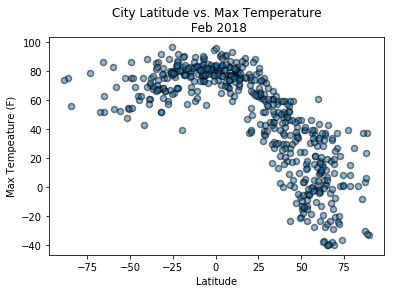

In [10]:
title = f'City Latitude vs. Max Temperature\n {last_date}'
x = df['latitude']
y = df['Max Temp']
plt.scatter(x, y, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title(title)
plt.ylabel('Max Tempeature (F)')
plt.xlabel('Latitude')
plt.savefig('results/maxtemp.png')
plt.show()

# Latitude vs. Humidity Plot

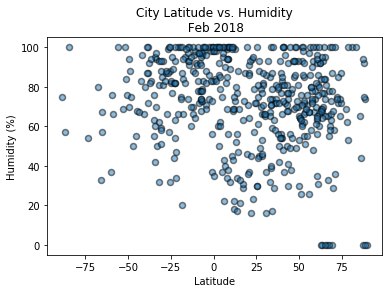

In [11]:
title = f'City Latitude vs. Humidity\n {last_date}'
y = df['Humidity']
plt.scatter(x, y, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title(title)
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.savefig('results/humidity.png')
plt.show()

# Latitude vs. Cloudiness Plot

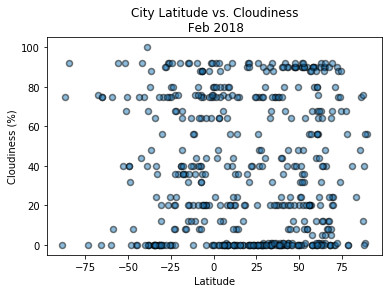

In [12]:
title = f'City Latitude vs. Cloudiness\n {last_date}'
y = df['Cloudiness']
plt.scatter(x, y, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title(title)
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.savefig('results/cloudiness.png')
plt.show()

# Latitude vs. Wind Speed Plot

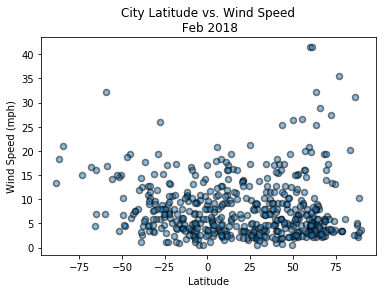

In [13]:
title = f'City Latitude vs. Wind Speed\n {last_date}'
y = df['Wind Speed']
plt.scatter(x, y, alpha=0.5, edgecolor='black', linewidths=1.5,)
plt.title(title)
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.savefig('results/windspeed.png')
plt.show()